## Ví dụ 1: Sự khác biết của phương pháp Random search so với Phương pháp Bayesian Optimization đối với bộ dữ liệu gồm nhiều chiều

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from skopt import BayesSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Mô hình Machine Learning
model = RandomForestClassifier()
random_search_scores = []
bayes_search_scores = []
# Random Search
for _ in range(50):
    # Tạo dữ liệu mẫu
    X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
    random_search = RandomizedSearchCV(model, n_iter=10, param_distributions={'n_estimators': [10, 50, 100, 200]}, cv=5)
    random_search.fit(X, y)
    random_search_best_score = random_search.best_score_
    random_search_scores.append(random_search_best_score)

    # Bayesian Optimization
    bayesian_optimization = BayesSearchCV(model, n_iter=10, search_spaces={'n_estimators': (10, 200)}, cv=5)
    bayesian_optimization.fit(X, y)
    bayesian_optimization_best_score = bayesian_optimization.best_score_
    bayes_search_scores.append(bayesian_optimization_best_score)
    # In kết quả
    print("Random Search best score:", random_search_best_score)
    print("Bayesian Optimization best score:", bayesian_optimization_best_score)

In [3]:
print(random_search_scores)

[0.9, 0.898, 0.899, 0.9, 0.9, 0.898, 0.897, 0.9000000000000001, 0.8990000000000002, 0.899, 0.899, 0.8969999999999999, 0.897, 0.899, 0.8930000000000001, 0.9, 0.901, 0.899, 0.899, 0.898, 0.8960000000000001, 0.9, 0.899, 0.897, 0.8950000000000001, 0.897, 0.9, 0.8969999999999999, 0.9010000000000001, 0.9049999999999999, 0.901, 0.9019999999999999, 0.8969999999999999, 0.898, 0.899, 0.901, 0.8969999999999999, 0.898, 0.9040000000000001, 0.9, 0.9, 0.8949999999999999, 0.901, 0.9010000000000001, 0.9, 0.9, 0.898, 0.8950000000000001, 0.898, 0.899]


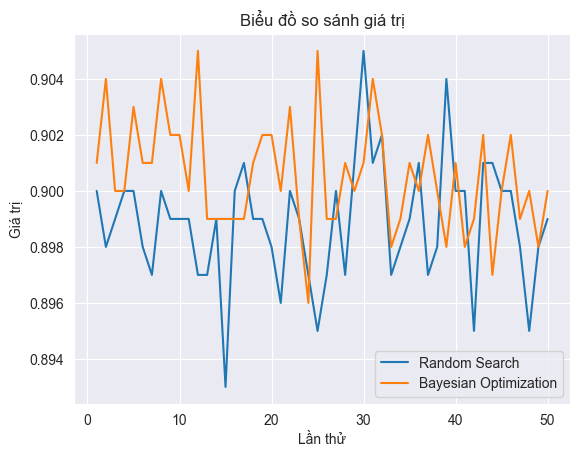

In [6]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Tạo danh sách chỉ số cho mảng giá trị
indices = range(1, len(random_search_scores) + 1)

# Vẽ đồ thị
plt.plot(indices, random_search_scores, label='Random Search')
plt.plot(indices, bayes_search_scores, label='Bayesian Optimization')

# Đặt tiêu đề và nhãn trục
plt.title('Biểu đồ so sánh giá trị')
plt.xlabel('Lần thử')
plt.ylabel('Giá trị')

# Hiển thị chú thích
plt.legend()

# Hiển thị đồ thị
plt.show()


# Ví dụ 2: So sánh phương pháp Grid Search với phương pháp Bayesian Optimization

In [8]:
from sklearn.model_selection import GridSearchCV

# Mô hình Machine Learning
model = RandomForestClassifier()
grid_search_scores = []
bayes_search_scores = []
for _ in range(50):
    # Tạo dữ liệu mẫu
    X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
    param_grid = {
        'n_estimators': [50, 100, 200],
        'min_samples_split': [2, 5, 10]
    }

    # Sử dụng grid search để tìm kiếm tham số tốt nhất
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X, y)
    grid_search_best_score = grid_search.best_score_
    grid_search_scores.append(grid_search_best_score)
    # Bayesian Optimization
    bayesian_optimization = BayesSearchCV(model, n_iter=10, search_spaces={'n_estimators': (10, 200)}, cv=5)
    bayesian_optimization.fit(X, y)
    bayesian_optimization_best_score = bayesian_optimization.best_score_
    bayes_search_scores.append(bayesian_optimization_best_score)
    # In kết quả
    print("Grid Search best score:", grid_search_best_score)
    print("Bayesian Optimization best score:", bayesian_optimization_best_score)

Grid Search best score: 0.9
Bayesian Optimization best score: 0.9020000000000001
Grid Search best score: 0.901
Bayesian Optimization best score: 0.9
Grid Search best score: 0.8960000000000001
Bayesian Optimization best score: 0.9
Grid Search best score: 0.898
Bayesian Optimization best score: 0.9029999999999999
Grid Search best score: 0.9019999999999999
Bayesian Optimization best score: 0.9
Grid Search best score: 0.899
Bayesian Optimization best score: 0.9019999999999999
Grid Search best score: 0.899
Bayesian Optimization best score: 0.901
Grid Search best score: 0.901
Bayesian Optimization best score: 0.9019999999999999
Grid Search best score: 0.9
Bayesian Optimization best score: 0.901
Grid Search best score: 0.899
Bayesian Optimization best score: 0.899
Grid Search best score: 0.8979999999999999
Bayesian Optimization best score: 0.9030000000000001
Grid Search best score: 0.8960000000000001
Bayesian Optimization best score: 0.9020000000000001
Grid Search best score: 0.90399999999999

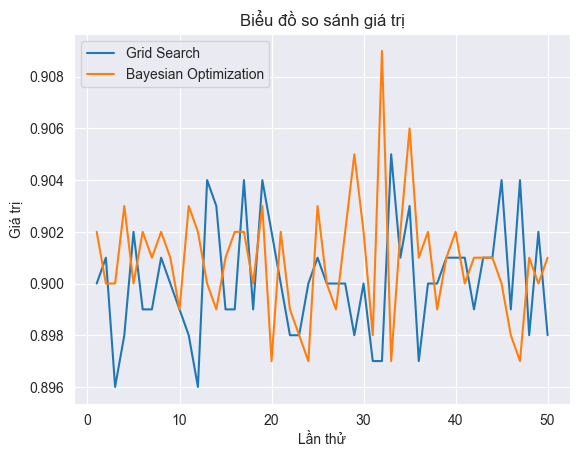

In [10]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Tạo danh sách chỉ số cho mảng giá trị
indices = range(1, len(random_search_scores) + 1)

# Vẽ đồ thị
plt.plot(indices, grid_search_scores, label='Grid Search')
plt.plot(indices, bayes_search_scores, label='Bayesian Optimization')

# Đặt tiêu đề và nhãn trục
plt.title('Biểu đồ so sánh giá trị')
plt.xlabel('Lần thử')
plt.ylabel('Giá trị')

# Hiển thị chú thích
plt.legend()

# Hiển thị đồ thị
plt.show()

C:\Users\Admin\PycharmProjects\MachineLearning\venv\Lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Admin\PycharmProjects\MachineLearning\venv\Lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Admin\PycharmProjects\MachineLearning\venv\Lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Admin\PycharmProjects\MachineLearning\venv\Lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Admin\PycharmProjects\MachineLearning\venv\Lib\site-packages\skopt\optimizer\optimizer.py:449: 

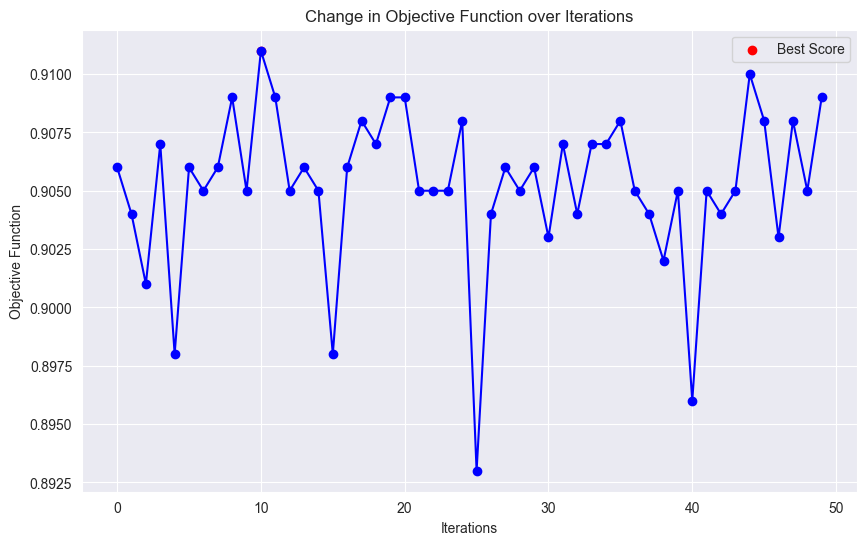

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skopt import BayesSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Tạo dữ liệu mẫu
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Mô hình Machine Learning
model = RandomForestClassifier()

# Bayesian Optimization
bayesian_optimization = BayesSearchCV(model, search_spaces={'n_estimators': (10, 200)}, cv=5)
bayesian_optimization.fit(X, y)

# Trích xuất thông tin
best_scores = bayesian_optimization.best_index_
all_scores = bayesian_optimization.cv_results_['mean_test_score']

# Trực quan hoá
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(all_scores)), all_scores, '-o', color='blue')
plt.scatter(best_scores, all_scores[best_scores], marker='o', color='red', label='Best Score')
plt.xlabel('Iterations')
plt.ylabel('Objective Function')
plt.title('Change in Objective Function over Iterations')
plt.legend()
plt.grid(True)
plt.show()


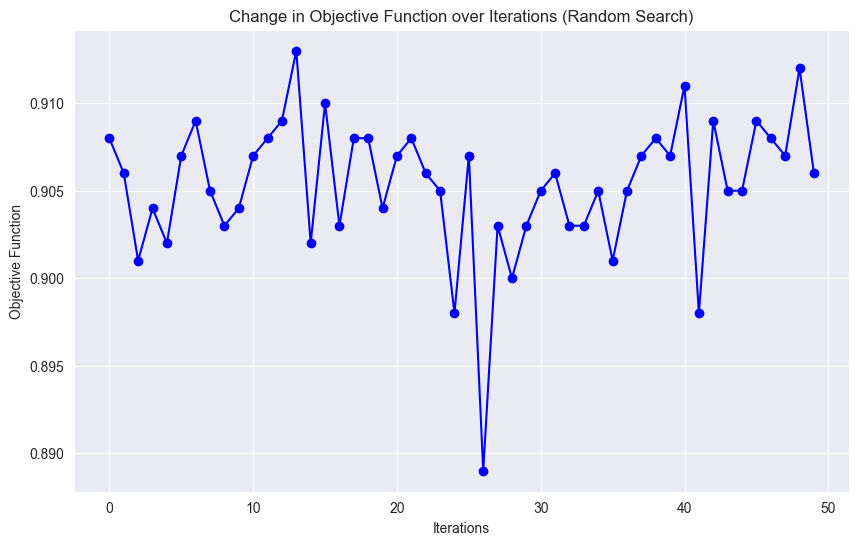

In [11]:
# Khởi tạo lại mô hình
model = RandomForestClassifier()

# Random Search
num_iterations = 50
param_values = np.arange(num_iterations)
scores = []

for _ in range(num_iterations):
    params = {'n_estimators': np.random.randint(10, 200)}
    model.set_params(**params)
    score = np.mean(cross_val_score(model, X, y, cv=5))
    scores.append(score)

# Trực quan hoá
plt.figure(figsize=(10, 6))
plt.plot(param_values, scores, '-o', color='blue')
plt.xlabel('Iterations')
plt.ylabel('Objective Function')
plt.title('Change in Objective Function over Iterations (Random Search)')
plt.grid(True)
plt.show()

In [12]:
print(np.max(scores))

0.913


## Áp dụng BO cho 1 bài toán Machine Learning đơn giản

In [27]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from skopt import BayesSearchCV

# Load dữ liệu Iris
data = load_iris()
X = data.data
y = data.target

# Xác định không gian tham số
param_space = {'C': (1e-6, 1e+6, 'log-uniform'),
               'gamma': (1e-6, 1e+1, 'log-uniform'),
               'kernel': ['linear', 'rbf']}

# Khởi tạo SVM classifier
svm = SVC()

# Tạo bộ tối ưu hóa Bayesian
opt = BayesSearchCV(svm, param_space, n_iter=50, cv=5)

# Tìm kiếm bộ tham số tối ưu
opt.fit(X, y)

# In ra bộ tham số tốt nhất
print("Best parameters: ", opt.best_params_)

# Đánh giá mô hình với bộ tham số tốt nhất
best_model = opt.best_estimator_
scores = cross_val_score(best_model, X, y, cv=5)
print("Cross-validations: ", scores)
print("Average: ", scores.mean())

C:\Users\Admin\PycharmProjects\MachineLearning\venv\Lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Best parameters:  OrderedDict([('C', 2897.2758046370864), ('gamma', 0.004006450599165209), ('kernel', 'rbf')])
Cross-validation scores:  [1.         1.         0.9        0.93333333 1.        ]
Average score:  0.9666666666666666
